# The Green Gold Rush: A Comprehensive Economic Analysis of Avocado Pricing
## Bella McClure
## Department of Economics 
## University of Connecticut
### December 15, 2023

In [83]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from datetime import datetime
from math import sqrt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.2f}'.format

   ### Abstract

   What is green, desirable, and fluctuating in value? Though the dollar bill may come to mind, the small but mighty avocado is also a valid answer. As of recent years, the fruit has grown immensely in popularity, specifically in the United States. The avocado consumption surge is due to various factors, including increased awareness of their health benefits and versatility in culinary applications; however, as economics has taught us, an increase in demand with the same supply will increase the price and that is precisely what has occurred. This paper will delve into the dynamic landscape of avocado pricing, employing advanced forecasting techniques to decipher the intricate interplay of factors influencing the market. Focusing on the unique characteristics of avocado price fluctuations, our study employs time series analysis to unravel seasonal patterns that have previously eluded traditional forecasting models. Through a meticulous examination of historical data provided by Hass Avocado Board, the author will uncover the nuances helpful to distributors and consumers alike.

Keywords: ARIMA, Price forecasting, Time series modeling

## Introduction 

   The avocado market, characterized by its seasonal ebbs and flows, presents a compelling arena for economic analysis. Traditional pricing models often grapple with the challenge of capturing the nuanced patterns inherent in agricultural commodities. In this context, the Autoregressive Integrated Moving Average (ARIMA) model emerged as a formidable tool. Through the lens of ARIMA modeling, we navigate the complexities of historical pricing data, offering predictions through which growers, distributors, and consumers can gain valuable insights into future pricing scenarios. The avocado, with its creamy allure, serves as our muse, guiding us through a journey where economic analysis becomes a means to cultivate sustainable growth within this ever-popular commodity market.
   
   For the purposes of this analysis, there will be three separate research topics being looked into. First, the author will utilize different graphic tools python has to offer to uncover seasonal patterns in the data, geetting a better understanding of consumer preferences. Second, research will be conducted into geographic trends regarding the pricing of avocados; more specifically, is there a haven for avocado lovers who are trying to be cost efficient? Lastly, he/she will use ARIMA to analyze the forecasting of the price of avocados. All of these topics (among others) will be addressed throughout the remainder of this paper. 

## Data Description 

 As previously mentioned, the data were taken from the Hass Avocado Board who has made historical data regarding volume sales and pricing public. The scope of time covered in the dataset is from December 2015 to January 2018. A description of some relevant variables can be seen below:

- Date: The date each observation occurred
- AveragePrice: The average price of an avocado (per unit cost)
- Total Volume: Total count of avocados sold on given date
- Total Bags: Total Bags (Small + Large + XLarge) of avocados sold on given date
- Type: Determines if the avocado was a 'conventional' avocado or an 'organic' avocado. 
- Year: The year each observation occurred
- Region: The city/region each observation occurred

### Data cleaning and preprocessing 

   In order to get the data ready for analysis, some cleaning reshaping needed to take place. Using some very common python commands, we can find out some descriptive statistics about the data.

In [3]:
data = pd.read_csv(r'C:\Users\irm20\Documents\UCONN\Senior_Sem1\ECON3322\avocado.csv') # reading in the csv file

In [4]:
df = data.drop(['Unnamed: 0', '4046', '4225', '4770'], axis = 1) # dropping the unnecessary varibles

In [5]:
df.head() # varibles are gone when checking the head of our data

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [6]:
df.shape # checking dimension

(18249, 10)

In [7]:
df.columns # checking column names 

Index(['Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [8]:
print(df.isnull()) # no null values in the dataset, so we can get into the analysis!

        Date  AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0      False         False         False       False       False       False   
1      False         False         False       False       False       False   
2      False         False         False       False       False       False   
3      False         False         False       False       False       False   
4      False         False         False       False       False       False   
...      ...           ...           ...         ...         ...         ...   
18244  False         False         False       False       False       False   
18245  False         False         False       False       False       False   
18246  False         False         False       False       False       False   
18247  False         False         False       False       False       False   
18248  False         False         False       False       False       False   

       XLarge Bags   type   year  regio

In [9]:
df.describe() #getting descriptive statistics on all numerical variables

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [109]:
# This bit of code is some reshaping for the time series analysis that will be performed in the next section of this report. This was performed in other ARIMA modeling performed.
# An explanation for each line of code is provided below:
df_1 = df.copy(deep = True) # Making an independent copy (deep is set to True)
df_1['Date'] = pd.to_datetime(df_1['Date']) # Converting the Date column to the correct format needed (datetime)
df_1.set_index('Date', inplace = True) # Setting the index to Date
df_1 = df_1.resample('W').sum() # Computing the sum at a daily rate which aggregates the data in a better way to perform ARIMA
df_1.head() # Rechecking the data to see everything came out correctly

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,
2015-01-04,140.54,84674337.20,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,78555807.24,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,78388784.08,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,76466281.07,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,119453235.25,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


### Exploratory Data Analysis 

   Now the author will look into how the data looks graphically and explore the variables of interest in greater detail. 

Text(0, 0.5, 'Count of Avocados')

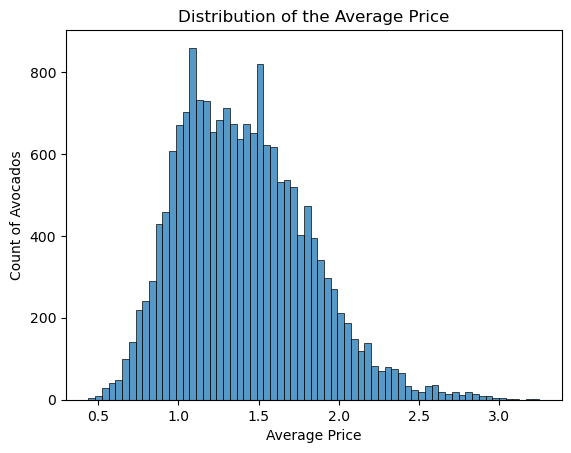

In [11]:
a = sns.histplot(data['AveragePrice']);
a.set_title('Distribution of the Average Price')
a.set_xlabel('Average Price')
a.set_ylabel('Count of Avocados')

The distribution of the average price seems to be normally distributed, with a very slight right skew. 

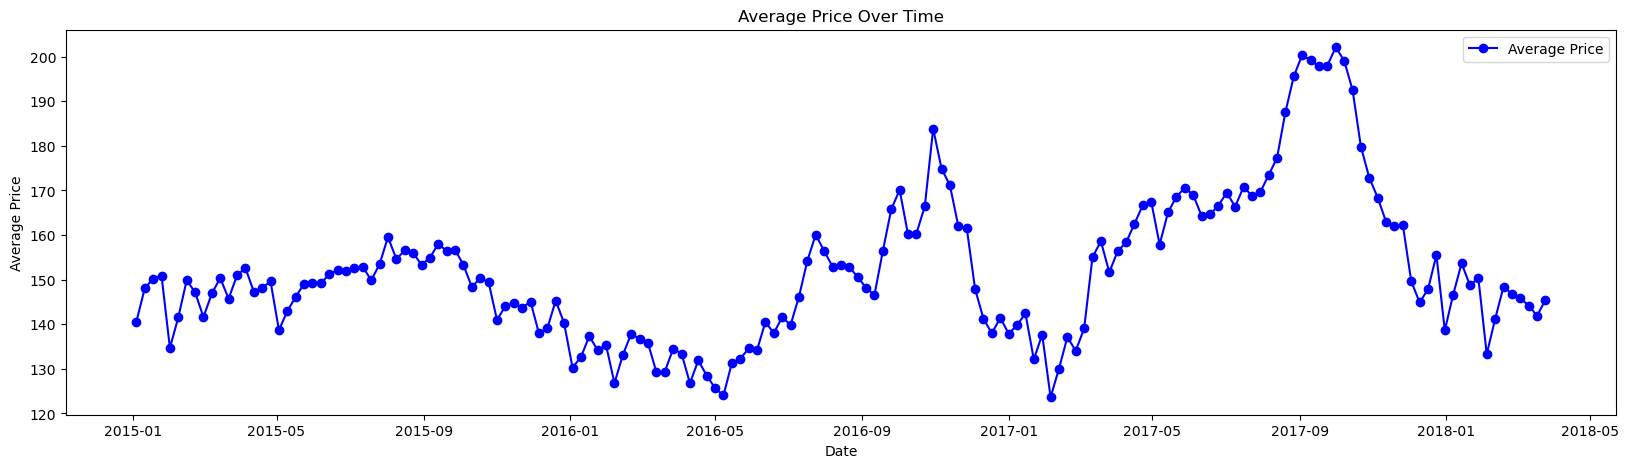

In [12]:
# Plotting the average price over time
plt.figure(figsize=(20, 5))
plt.plot(df_1.index, df_1['AveragePrice'], label='Average Price', color='blue', marker='o')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(False)
plt.show()

From this graph it is apparent that there are three peaks in the data, with each peak increasing in value as time goes on. These peaks also all seem to be around the ninth month of the year (September). 

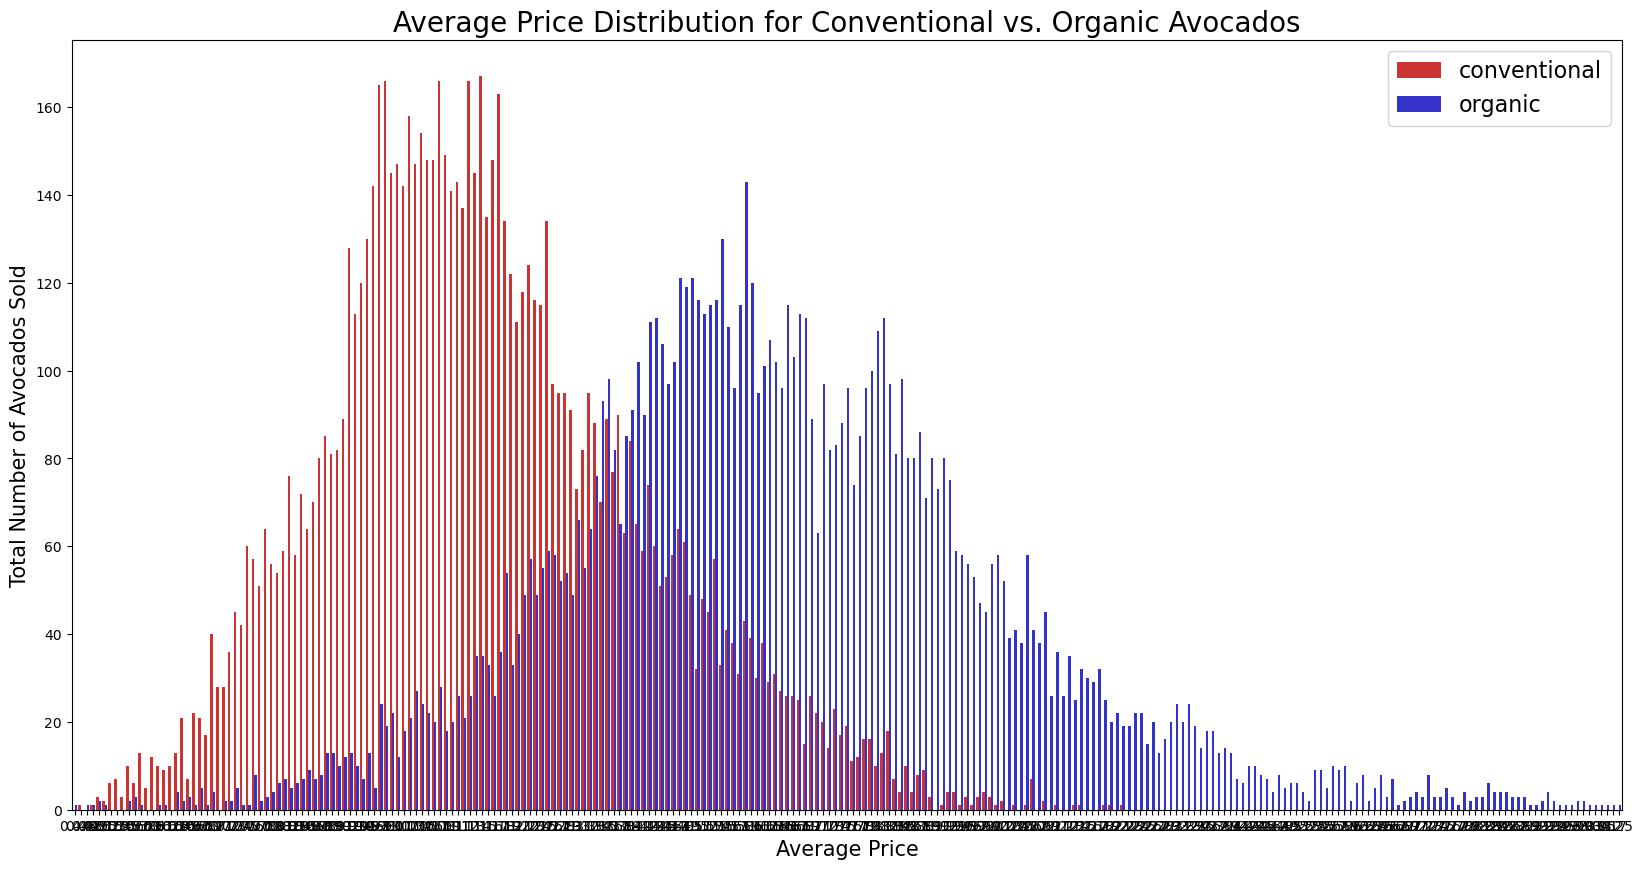

In [13]:
# Plotting the average price for conventional and organic 
plt.figure(figsize=(20,10))
b = sns.countplot(x='AveragePrice', hue='type', data=df, palette={'conventional':'r','organic':'b'}, saturation=0.6)
b.set_title('Average Price Distribution for Conventional vs. Organic Avocados', fontsize=20)
b.set_xlabel('Average Price',fontdict={'size':15})
b.set_ylabel('Total Number of Avocados Sold',fontdict={'size':15})
b.legend(fontsize=16)

   This graph is very interesting to analyze because one can really visualize the difference in price for conventional and organic avocados. The fact that this graph is bimodal indicates the peak for the different types of avocados are different, with conventional being skewed slightly right indicating a lower average price. Another insight gained from the graph is that there seem to be more conventional avocados sold in total than organic, a phenomena that makes sense from an economic standpoint. 

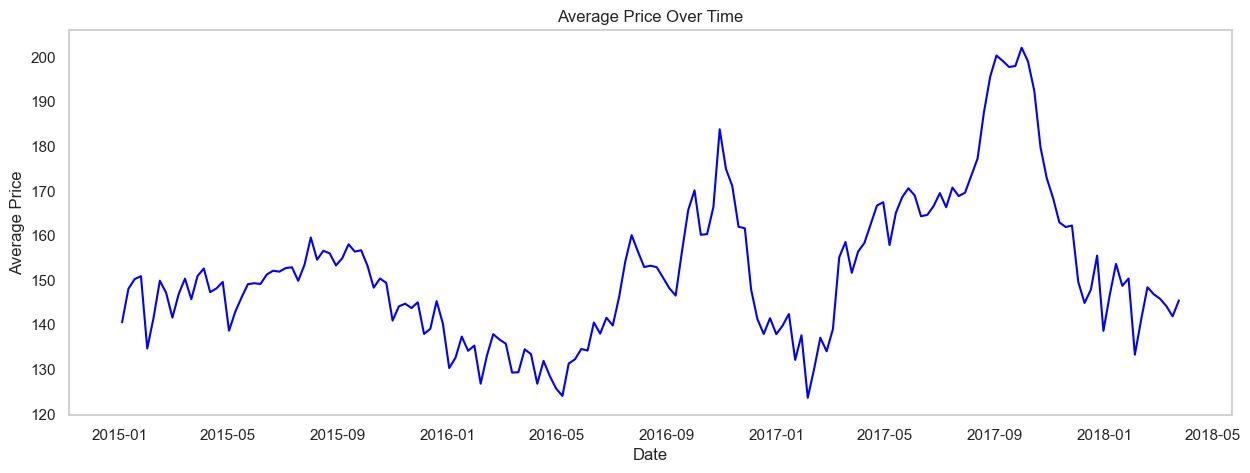

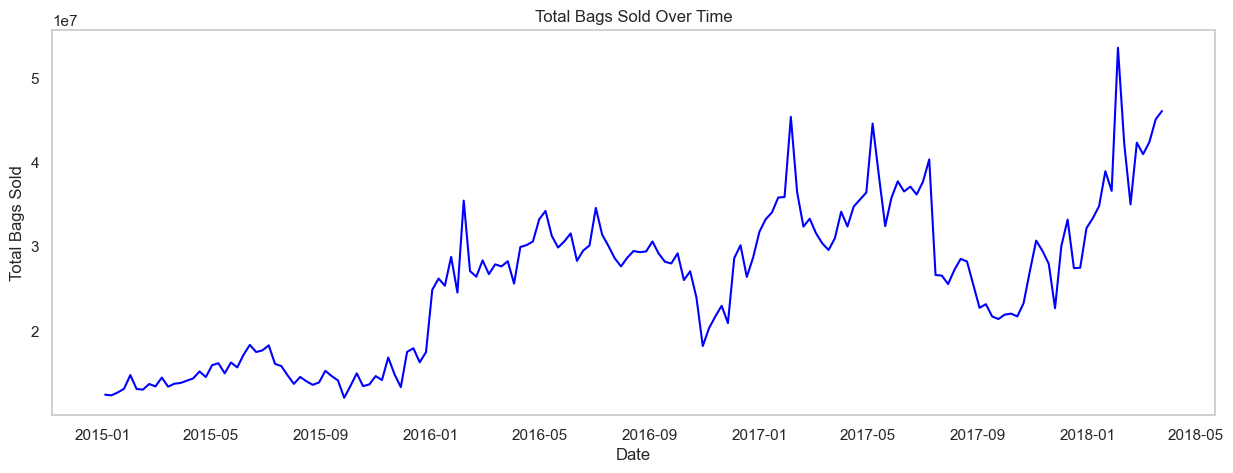

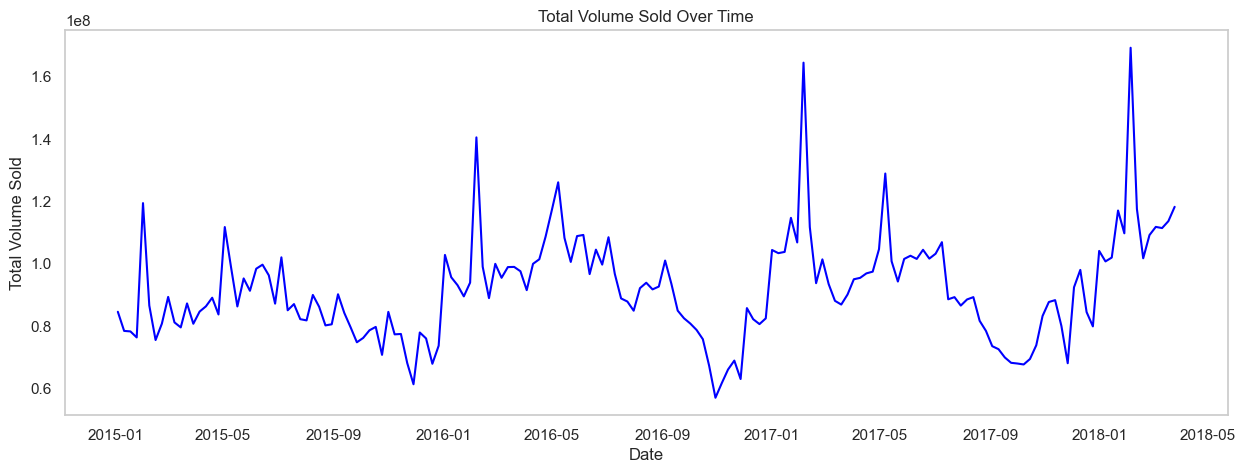

In [75]:
# Figure depicting average price over time
plt.figure(figsize=(15, 5))
plt.plot(df_1.index, df_1['AveragePrice'], label='Average Price', color='blue')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(False)
plt.show()
# Figure depicting the total number of bags sold over time 
plt.figure(figsize=(15, 5))
plt.plot(df_1.index, df_1['Total Bags'], label='Total Bags', color='blue')
plt.title('Total Bags Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bags Sold')
plt.grid(False)
plt.show()
# Figure depicting the total volume of avocados sold over time 
plt.figure(figsize=(15, 5))
plt.plot(df_1.index, df_1['Total Volume'], label='Total Volume', color='blue')
plt.title('Total Volume Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')
plt.grid(False)
plt.show()

   Many observations can be drawn from these three graphs. A list of the phenomena can be found below:

- The number of total bags and total volume has an inverse relationship with the average price, meaning when the price goes up (on average), the total bags and total volume sold went down. 
    - If the graphs were able to be overlaid (cannot due to the different scales on the y-axis), the peaks of the average price would correlate almost perfectly with the troughs of both the total bags sold and the total volume. 
- Despite the peak average price increasing every cycle, the total number of bags sold remains steady, indicating that consumers are still willing to suck it up and pay a highest price over time! This is good news for growers and distributers of avocados! On the other hand, the inelastic nature of the avocado is unfortunately going to plauge consumers. 

All observations can be directly explained by different economic principles, more specifically the law of supply and demand. Since these graphs are very macro, it is difficult to draw conclusions about which month specifically is the best or worst, but that is not necessary to be able to make valid observations. 

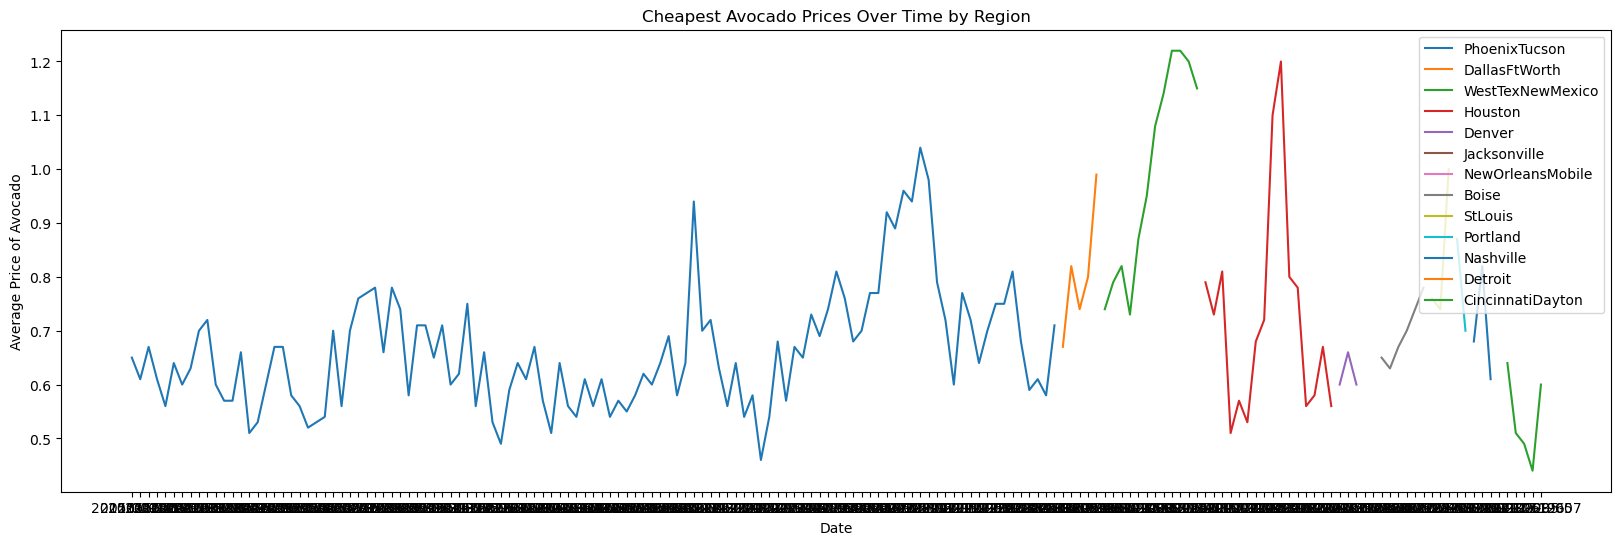

In [113]:
# Finding which regions had the cheapest avocados ove time and how those prices compare
cheapest_regions = df.groupby('Date')['AveragePrice'].idxmin()
cheapest_prices = df.loc[cheapest_regions]

# Plotting the results!
plt.figure(figsize=(20, 6))
for region in cheapest_avocado_prices['region'].unique():
    region_data = cheapest_prices[cheapest_prices['region'] == region]
    plt.plot(region_data['Date'], region_data['AveragePrice'], label = region)

plt.title('Cheapest Avocado Prices Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Average Price of Avocado')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()


This graph helps out all those avocado lovers who are trying to make a move to the region with the lowest prices in this specific market. Per the legend one can notice that the cheapest cities/regions are dominated by the South. This is not entirely surprising since a lot of avocados sold in the United States are imported from Mexico and the domestically grown ones come entirely from the South (Florida, Arizona, Texas). Thus, the law of supply prevails here again. These states likely have a greater supply and much lower distribution fees, resulting in a lower average price. 

## Methods and Results

Now, the time series modeling starts. This is where the reshaping of the data earlier on will come into play. Before starting the ARIMA modeling, however, the assumptions must be checked to be sure the results are valid. The three assumptions that will be verified are listed below:

- Time series is stationary 
- Autocorrelation
- Normally distributed residuals

In [111]:
#More reshaping
df_1 = df_1.drop((['Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region']), axis = 1)
df_1.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


In [60]:
# Stationarity: to verify this assumption the Augmented Dickey-Fuller test was used
def stationarity(timeseries):
    model_mean = timeseries.rolling(window = 12).mean()
    model_sd = timeseries.rolling(window = 12).std()

    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

# Printing results
    if result[1] <= 0.05:
        print("The assumption of stationarity is verified.")
    else:
        print("The assumption of stationarity is NOT verified.")
stationarity(df_1['AveragePrice'])

ADF Statistic: -2.3636450221472303
p-value: 0.15226126304825144
Critical Values: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}
The assumption of stationarity is NOT verified.


Unfortunately, it seems this assumption is breached. Thus, we must transform our variable (take log). 

In [69]:
df_1['log_AvgPrice'] = np.log(df_1['AveragePrice'])
stationarity(df_1['log_AvgPrice'])

ADF Statistic: -2.4957130232343436
p-value: 0.11652087994435167
Critical Values: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}
The assumption of stationarity is NOT verified.


While the p-value did decrease slightly, it is still above our predetermined alpha level of 0.05. Given the time constraint of this analysis, the analysis will continue with the other assumptions.

<Figure size 1500x600 with 0 Axes>

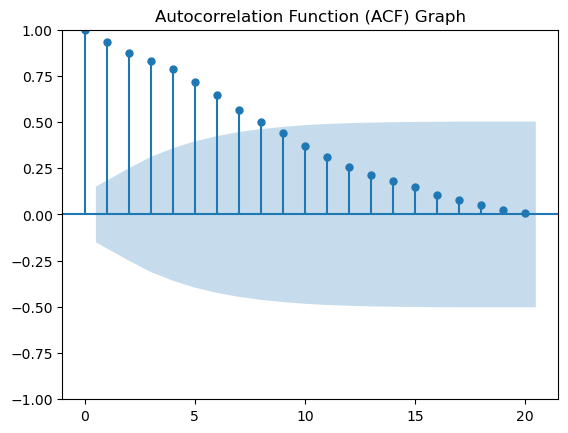

<Figure size 1500x600 with 0 Axes>

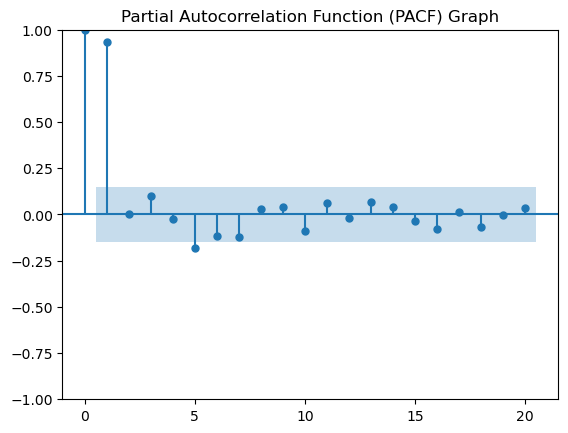

In [76]:
# Autocorrelation: To look into this, the author plotted the ACF and PACF graphs
# Plotting ACF
plt.figure(figsize=(15, 6))
plot_acf(df_1['AveragePrice'], lags=20)
plt.title('Autocorrelation Function (ACF) Graph')
plt.show()

# Plotting PACF
plt.figure(figsize=(15, 6))
plot_pacf(df_1['AveragePrice'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) Graph')
plt.show()

These graphs look good and the assumption is deemed verified. The normality of the residuals will be checked after fitting the model.

                               SARIMAX Results                                
Dep. Variable:           log_AvgPrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 308.987
Date:                Fri, 15 Dec 2023   AIC                           -609.975
Time:                        10:58:04   BIC                           -597.479
Sample:                    01-04-2015   HQIC                          -604.904
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1485      0.785     -0.189      0.850      -1.688       1.391
ma.L1          0.0728      0.776      0.094      0.925      -1.448       1.594
ma.L2         -0.1238      0.099     -1.252      0.2

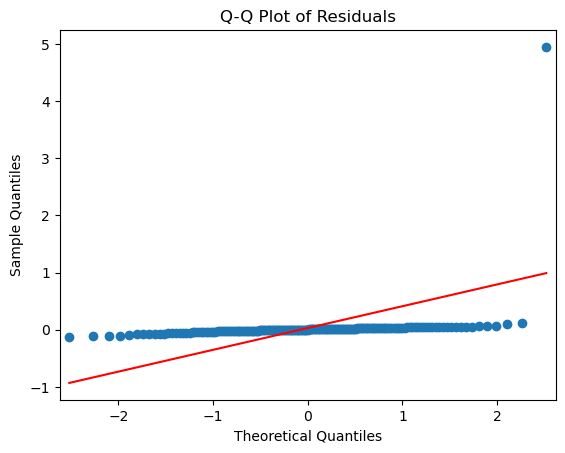

In [85]:
# Fitting the ARIMA model!
order = (1, 1, 2)  
model = ARIMA(df_1['log_AvgPrice'], order=order)
results = model.fit()
print(results.summary())

# Normality of residuals: This assumption is now checked with use of the qq-plot
residuals = results.resid
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

Though it is not perfect, the assumption is not violated badly and thus nothing further will be done. Now that the fitted model has been made, it is time to see how well it did at predictions. 

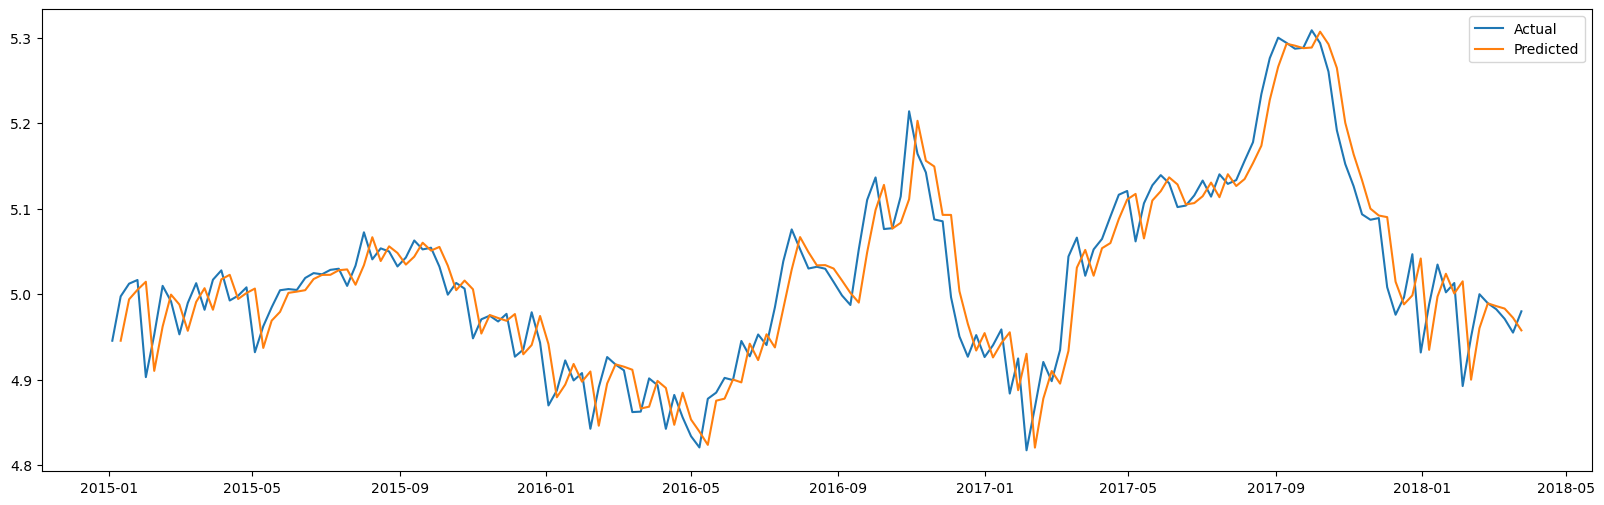

In [98]:
#Checking how well the model performed
df_1['predicted_values'] = results.predict(start=1, end=len(df_1)-1, dynamic=False) # making a new column in the df_1 with the predicted values
#Plotting results
plt.figure(figsize=(20, 6))
plt.plot(df_1['log_AvgPrice'], label='Actual')
plt.plot(df_1['predicted_values'], label='Predicted')
plt.legend()
plt.grid(False)
plt.show()

As is evident from the graph, the ARIMA model did a fair job at capturing the peaks and troughs from the actual data!

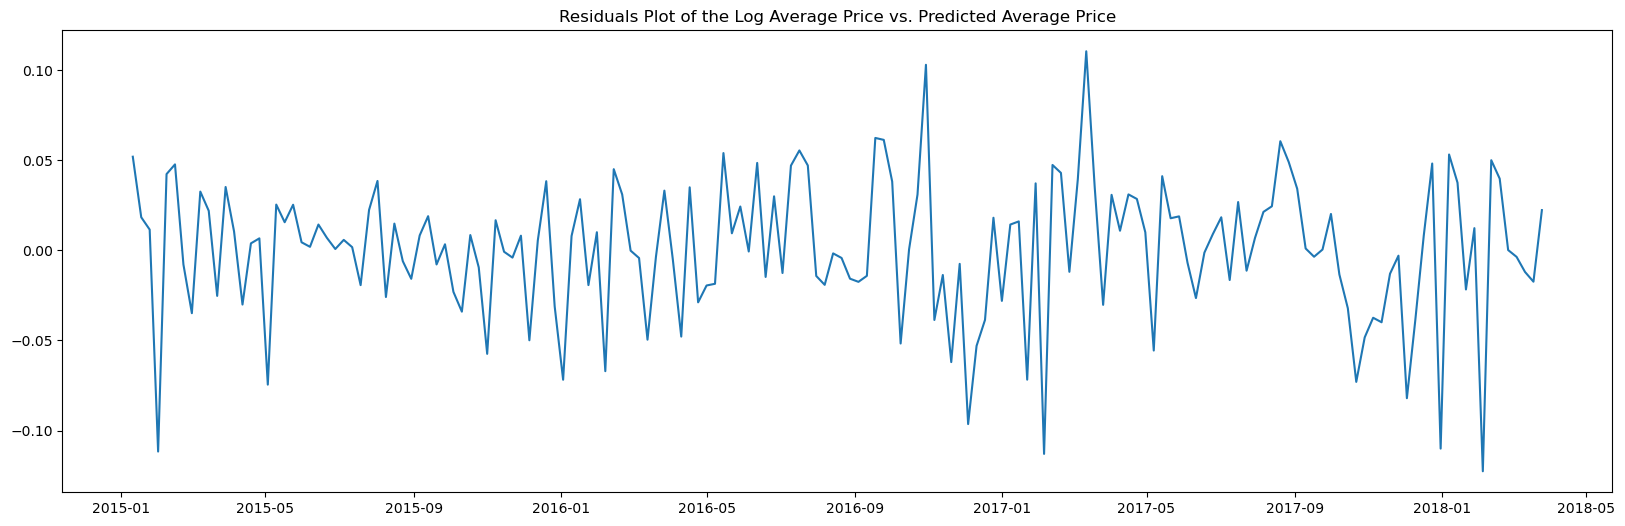

In [102]:
diff_residuals = df_1['log_AvgPrice'] - df_1['predicted_values']
plt.figure(figsize=(20,6))
plt.plot(diff_residuals)
plt.title('Residuals Plot of the Log Average Price vs. Predicted Average Price')
plt.show()

Based on the graph, there does not seem to be any serious or obvious patterns in the prediction accuracy. 

## Conclusion

   To summarize, the avocado pricing market seems to have the typical cyclical patterns many other foods exhibit (mainly seasonal). The ARIMA model that was employed seems to be a valuable tool for avocado pricing predictions; however, there are many limitations to this analysis that should also be addressed. The good news is that many of these limitations can be resolved with more time to perform the analysis and are all very possible fixes. Looking more into verifying the stationarity assumption is a top priority. Using the technique of differencing and then taking the log may be a good solution. Without this being verified, the results of the analysis can be put into question. Additionally, adding more recent data will give the model more to train on and thus increase performance. It will also give consumers and distributors a more realistic view of what the pricing looks like today.
   
   As economists continue to navigate the avocado market and other produce markets, ongoing research efforts and the integration of advanced modeling techniques hold the promise of further improving our ability to understand and predict pricing dynamics as shwon by this analysis. 